<a href="https://colab.research.google.com/github/AbiyyuFathin/PyTorch-MNIST-Prediction/blob/main/Test_AI_Researcher_Abiyyu_Fathin_Derian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abiyyu Fathin Derian
------------------------

## Import Library

In [ ]:
# Import basic library
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Import PyTorch library
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

## Load Dataset

In [ ]:
# load and normalize the dataset
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
# Split the training and testing datset
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 50, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size = 50, shuffle=True)

## Explore The Dataset

In [ ]:
# Iterate the training dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show the dimension of the dataset
print(images.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


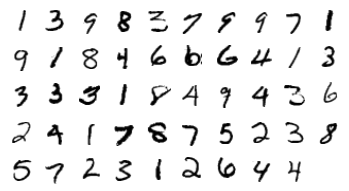

In [ ]:
# Visualize the sample of dataset in one batch
figure = plt.figure()
num_of_images = 49
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Artificial Neural Network Modelling

In [ ]:
# Define the ANN model with 2 hidden layers
input_size = 784
hidden_sizes = [100, 50]
output_size = 10

# Run the ANN model
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
# Show the model output
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
# Set loss function using cross entropy
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels) 

In [ ]:
# Use backward to update the weight
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0057, -0.0057, -0.0057,  ..., -0.0057, -0.0057, -0.0057],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        ...,
        [ 0.0080,  0.0080,  0.0080,  ...,  0.0080,  0.0080,  0.0080],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018]])


## Train The Dataset using ANN Model

In [ ]:
# Set the optimizer using Adam with learning rate 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)
time0 = time()

# Set the usable list variable
loss_list = []
iteration_list = []
count = 0

# Set the epoch to 20 times
epochs = 20

# Loop the training dataset and get its training loss
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

        count += 1

        # store loss and iteration
        loss_list.append(loss.data.item())
        iteration_list.append(count)
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.3891585760097951
Epoch 1 - Training loss: 0.19319397878522673
Epoch 2 - Training loss: 0.1399671851657331
Epoch 3 - Training loss: 0.11679814813891426
Epoch 4 - Training loss: 0.10007274635562984
Epoch 5 - Training loss: 0.08586979234183673
Epoch 6 - Training loss: 0.07903102154436055
Epoch 7 - Training loss: 0.07004398061413668
Epoch 8 - Training loss: 0.06347219845444974
Epoch 9 - Training loss: 0.06041735774667662
Epoch 10 - Training loss: 0.05514480538135103
Epoch 11 - Training loss: 0.05261340171821454
Epoch 12 - Training loss: 0.04597807758919468
Epoch 13 - Training loss: 0.04508661770984569
Epoch 14 - Training loss: 0.044647685730597006
Epoch 15 - Training loss: 0.0389103822608134
Epoch 16 - Training loss: 0.04096291099487037
Epoch 17 - Training loss: 0.03588821307804513
Epoch 18 - Training loss: 0.03509662644838196
Epoch 19 - Training loss: 0.03294195338787782

Training Time (in minutes) = 4.096094127496084


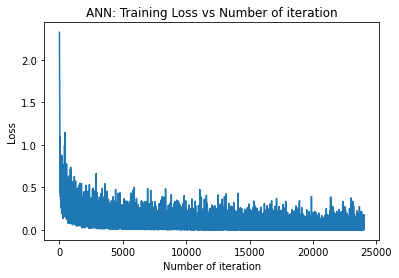

In [ ]:
# visualization training loss loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Training Loss vs Number of iteration")
plt.show()

In [ ]:
# Set the usable variable
correct_count, all_count = 0, 0
iteration_list = []
accuracy_list = []
count = 0

# Set the epoch to 20 times
epochs = 20

# Loop the training dataset and get its accuracy
for e in range(epochs):
  for images,labels in trainloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

      accuracy = (correct_count/all_count) 

      count += 1

      # store accuracy and iteration
      accuracy_list.append(accuracy)
      iteration_list.append(count)

  else:
      print("Epoch {} - Accuracy: {}".format(e, accuracy))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Accuracy: 0.9876166666666667
Epoch 1 - Accuracy: 0.9876166666666667
Epoch 2 - Accuracy: 0.9876166666666667
Epoch 3 - Accuracy: 0.9876166666666667
Epoch 4 - Accuracy: 0.9876166666666667
Epoch 5 - Accuracy: 0.9876166666666667
Epoch 6 - Accuracy: 0.9876166666666667
Epoch 7 - Accuracy: 0.9876166666666667
Epoch 8 - Accuracy: 0.9876166666666667
Epoch 9 - Accuracy: 0.9876166666666667
Epoch 10 - Accuracy: 0.9876166666666667
Epoch 11 - Accuracy: 0.9876166666666667
Epoch 12 - Accuracy: 0.9876166666666667
Epoch 13 - Accuracy: 0.9876166666666667
Epoch 14 - Accuracy: 0.9876166666666667
Epoch 15 - Accuracy: 0.9876166666666667
Epoch 16 - Accuracy: 0.9876166666666667
Epoch 17 - Accuracy: 0.9876166666666667
Epoch 18 - Accuracy: 0.9876166666666667
Epoch 19 - Accuracy: 0.9876166666666667

Training Time (in minutes) = 9.364343067010244


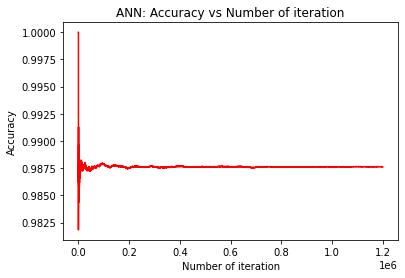

In [ ]:
# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## Test and Evaluate The Testing Dataset

In [ ]:
# Set th eusable variable
correct_count, all_count = 0, 0

# Loop the testing dataset and get its final accuracy
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

    accuracy = (correct_count/all_count) * 100.0

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy = {}%".format(accuracy))

Number Of Images Tested = 10000

Model Accuracy = 97.44%
